### **Importing needed packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

### **Download the needed data** 🔰

In [ ]:
from google.colab import files


uploaded = files.upload()



Saving FuelConsumptionCo2.csv to FuelConsumptionCo2.csv


## **Reading the data**

In [ ]:
import pandas as pd
import io

df = pd.read_csv("FuelConsumptionCo2.csv")
df.head(5)



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## **Data Exploration**

In [ ]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(7)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232


### Select some feature to explore more

array([[<Axes: title={'center': 'CYLINDERS'}>,
        <Axes: title={'center': 'ENGINESIZE'}>],
       [<Axes: title={'center': 'CO2EMISSIONS'}>,
        <Axes: title={'center': 'FUELCONSUMPTION_COMB'}>]], dtype=object)

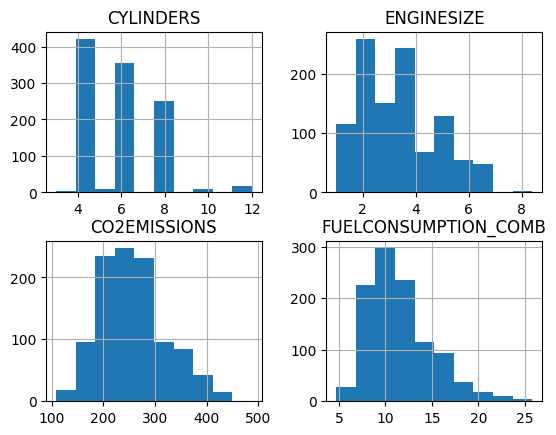

In [ ]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()



Text(0, 0.5, 'CO2EMISSIONS')

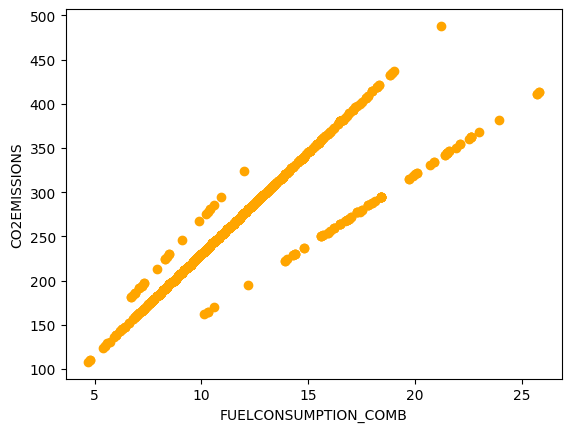

In [ ]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS,color = 'Orange')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")

Text(0, 0.5, 'CO2EMISSIONS')

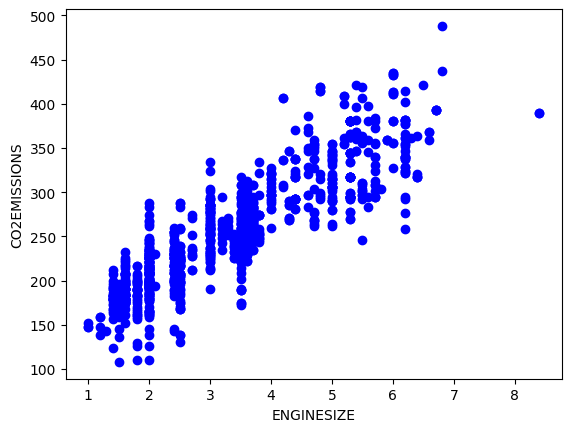

In [ ]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")

Text(0, 0.5, 'CO2EMISSIONS')

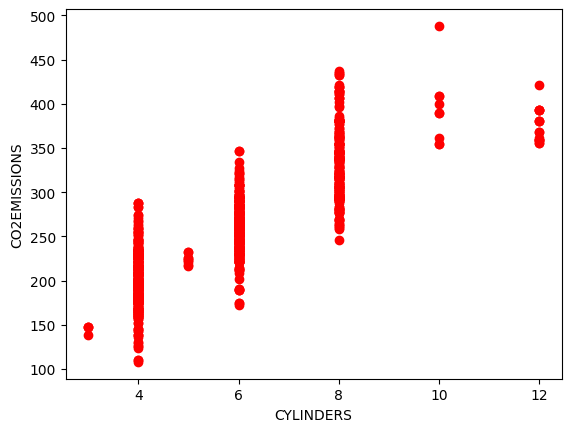

In [ ]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS, color = 'red')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")

### Creat Train and Test **Dataset**

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## **Simple Regression model**

###**Train and Test data distribution**

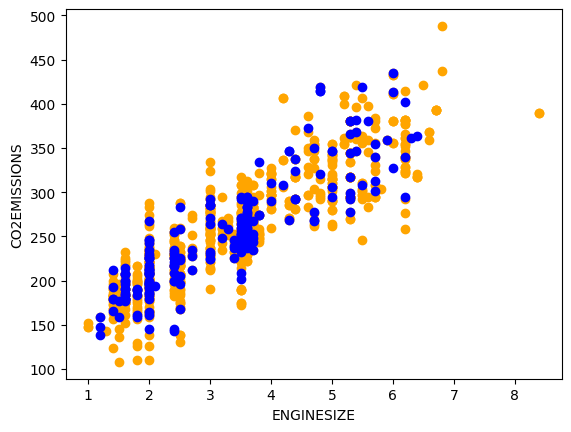

In [ ]:
plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS , color = "orange")
plt.scatter(test.ENGINESIZE , test.CO2EMISSIONS , color = "blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

## Modeling

In [ ]:
from sklearn import linear_model

In [ ]:
import numpy as np
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x,train_y)
#The coefficients:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


Coefficients:  [[38.68019925]]
Intercept:  [126.40820202]


### Plot Output

Text(0, 0.5, '.CO2EMISSIONS')

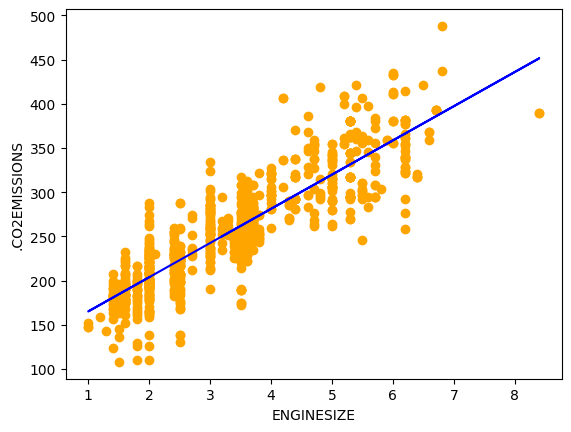

In [ ]:
plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS , color = "Orange")
plt.plot(train_x , regr.predict(train_x) , "b-")
plt.xlabel("ENGINESIZE")
plt.ylabel(".CO2EMISSIONS")

### Evaluation

In [ ]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
y_predict = regr.predict(test_x)
r2_score(y_predict ,test_y )
print("The R2 score of our data is: %.3f" %r2_score(y_predict ,test_y ))

The R2 score of our data is: 0.726
